In [1]:
REPO_PATH = '/home/shenm19/prj/evfi-manuscript-public/'

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import os
import matplotlib

from matplotlib import font_manager
font_dirs = ['/home/shenm19/arial-font/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'Arial'

In [3]:
exp_df = pd.read_csv(os.path.join(REPO_PATH, 'data-exp/tead3_spr_v3.csv'))

In [4]:
exp_df['KD (nM)'] = exp_df['KD (mM)'] * 1000

### plot with campaign 1

In [5]:
c1_kds = [
    56.2, 31.2, 77.3, 54.1, 41.4, 50, 10.6, 4.65, 2.2, 1.41, 1.67, 1
]
c1_df = pd.DataFrame({'KD (mM)': c1_kds, 'Design': ['Campaign 1'] * len(c1_kds)})

c1_and_2_df = pd.concat([c1_df, exp_df])

c1_and_2_df['KD (nM)'] = c1_and_2_df['KD (mM)'] * 1000

c1_and_2_df = c1_and_2_df.reset_index(drop = True)

/tmp/ipykernel_73867/2968108496.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Campaign 1\nHuman expert', 'Campaign 2\nHuman expert', 'Campaign 2\nDeepEVFI'])
meta NOT subset; don't know how to subset; dropped


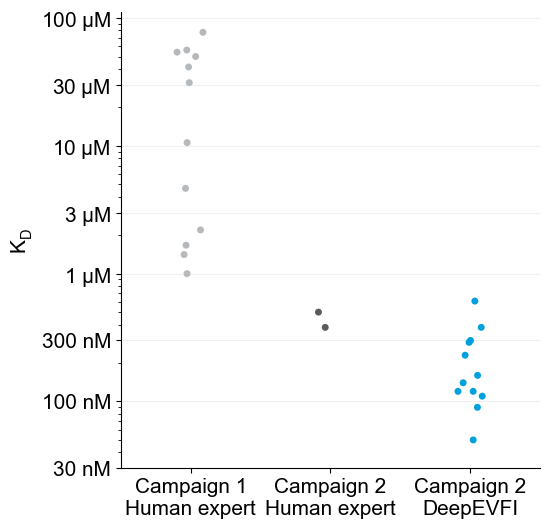

In [6]:
fig, ax = plt.subplots(figsize = (5.6, 5.4))


sns.stripplot(
    x = 'Design',
    y = 'KD (nM)',
    data = c1_and_2_df,
    hue = 'Design',
    palette = {
        'Campaign 1': '#b6b9bc',
        'Human': '#595c5f',
        'DeepFitness': '#00a0dc',
    },
    ax = ax
)

sns.despine()
plt.grid(axis = 'y', alpha = 0.2)
plt.yscale('log')

plt.ylim(bottom = 30)

# ticks
plt.tick_params(axis='y', which='minor')
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter("%g"))
# ax.yaxis.set_minor_formatter(FormatStrFormatter("%g"))

ax.set_yticks([30, 100, 300, 1000, 3000, 1e4, 3e4, 1e5])
ax.set_yticklabels(['30 nM', '100 nM', '300 nM',
                    '1 $\mathregular{\mu}$M', '3 $\mathregular{\mu}$M', 
                    '10 $\mathregular{\mu}$M', '30 $\mathregular{\mu}$M', 
                    '100 $\mathregular{\mu}$M'])

ax.set_xticklabels(['Campaign 1\nHuman expert', 'Campaign 2\nHuman expert', 'Campaign 2\nDeepEVFI'])

# Modify all text labels, ensure fontsize is between 5 and 7.
FSIZE = 15
ax.set_title('', fontsize = FSIZE)
ax.set_xlabel('', fontsize = FSIZE)
ax.set_ylabel('$\mathregular{K_D}$', fontsize = FSIZE)
ax.tick_params(axis = 'both', which = 'major', labelsize = FSIZE)
ax.tick_params(axis = 'both', which = 'minor', labelsize = FSIZE)
ax.get_legend().remove()

# Save to pdf, ensuring that text fields are editable and not imported as shapes
plt.tight_layout()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

out_fn = 't3e-spr-plot.pdf'
plt.savefig(out_fn, transparent = True)
plt.savefig(out_fn.replace('.pdf', '.png'))